In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [2]:
data = pd.read_csv("FWWW.csv")

In [3]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [23]:
def clean_data(df):
     
    df["on_target_percent"]=df["on_target"]/df["attempts"]
    
    df["finishes_per_attempt"]=df["goal"]/df["attempts"]
    
    df["finished_per_target"]=df["goal"]/df["on_target"]
    
    df.fillna(float(0.00),inplace=True)
    return df


In [24]:
clean_data(data)

,game_date,game_ids,team,venue,goal,attempts,on_target,off_target,blocked,corners,...,tackles,blocks,clearance,yellow_cards,direct_red_cards,indirect_red_cards,fouls,on_target_percent,finishes_per_attempt,finished_per_target
0,2019-06-07 07:00:00,300438238,Korea Republic,away,0.0,4.0,1.0,2.0,1.0,1.0,...,15.0,5.0,17.0,0.0,0.0,0.0,11.0,0.250000,0.000000,0.000000
1,2019-06-07 07:00:00,300438238,France,home,4.0,21.0,8.0,8.0,5.0,13.0,...,10.0,1.0,7.0,0.0,0.0,0.0,11.0,0.380952,0.190476,0.500000
2,2019-06-08 01:00:00,300438216,China PR,away,0.0,4.0,1.0,2.0,1.0,3.0,...,28.0,5.0,26.0,4.0,0.0,0.0,19.0,0.250000,0.000000,0.000000
3,2019-06-08 01:00:00,300438216,Germany,home,1.0,18.0,5.0,8.0,5.0,8.0,...,13.0,1.0,14.0,1.0,0.0,0.0,7.0,0.277778,0.055556,0.200000
4,2019-06-08 04:00:00,300438234,South Africa,away,1.0,4.0,2.0,0.0,2.0,2.0,...,19.0,8.0,34.0,2.0,0.0,1.0,13.0,0.500000,0.250000,0.500000
5,2019-06-08 04:00:00,300438234,Spain,home,3.0,25.0,12.0,5.0,8.0,5.0,...,6.0,2.0,12.0,1.0,0.0,0.0,12.0,0.480000,0.120000,0.250000
6,2019-06-08 07:00:00,300438213,Nigeria,away,0.0,9.0,1.0,6.0,2.0,5.0,...,8.0,2.0,23.0,2.0,0.0,0.0,10.0,0.111111,0.000000,0.000000
7,2019-06-08 07:00:00,300438213,Norway,home,3.0,10.0,4.0,4.0,2.0,5.0,...,6.0,2.0,21.0,0.0,0.0,0.0,5.0,0.400000,0.300000,0.750000
8,2019-06-09 01:30:00,300438219,Jamaica,away,0.0,13.0,3.0,6.0,4.0,3.0,...,10.0,4.0,33.0,1.0,0.0,0.0,9.0,0.230769,0.000000,0.000000
9,2019-06-09 01:30:00,300438219,Brazil,home,3.0,18.0,6.0,8.0,4.0,10.0,...,20.0,4.0,36.0,2.0,0.0,0.0,14.0,0.333333,0.166667,0.500000


In [25]:
data.isna().sum()

game_date               0
game_ids                0
team                    0
venue                   0
goal                    0
attempts                0
on_target               0
off_target              0
blocked                 0
corners                 0
offsides                0
ball_possession         0
pass_accuracy           0
passes                  0
passes_completed        0
distance                0
tackles                 0
blocks                  0
clearance               0
yellow_cards            0
direct_red_cards        0
indirect_red_cards      0
fouls                   0
on_target_percent       0
finishes_per_attempt    0
finished_per_target     0
dtype: int64

In [6]:
average_df=data.groupby("team").mean()

In [7]:
average_df

,game_ids,goal,attempts,on_target,off_target,blocked,corners,offsides,ball_possession,pass_accuracy,...,tackles,blocks,clearance,yellow_cards,direct_red_cards,indirect_red_cards,fouls,on_target_percent,finishes_per_attempt,finished_per_target
team,,,,,,,,,,,,,,,,,,,,,
Argentina,300438220.0,0.0,4.0,1.5,1.5,1.0,0.0,2.0,0.375,0.600,...,16.0,2.0,22.5,1.0,0.0,0.0,8.0,0.433333,0.000000,0.000000
Australia,300438226.0,2.0,13.0,6.0,5.0,2.0,5.0,2.5,0.540,0.790,...,7.5,2.5,20.5,0.5,0.0,0.0,13.5,0.483660,0.196078,0.371429
Brazil,300438222.0,2.5,15.0,5.0,6.0,4.0,6.5,1.0,0.530,0.760,...,20.5,2.5,44.5,2.5,0.0,0.0,10.5,0.333333,0.166667,0.500000
Cameroon,300438229.0,0.5,8.0,1.5,4.0,2.5,3.5,1.5,0.385,0.580,...,12.5,4.5,19.5,2.5,0.0,0.0,13.5,0.190909,0.045455,0.250000
Canada,300438223.0,1.5,19.0,5.0,8.5,5.5,9.0,2.0,0.675,0.825,...,10.0,0.5,14.0,0.0,0.0,0.0,9.0,0.261364,0.076705,0.291667
Chile,300438226.5,0.0,3.5,0.5,2.5,0.5,0.5,1.5,0.340,0.615,...,23.0,4.5,32.5,2.5,0.0,0.0,10.5,0.083333,0.000000,0.000000
China PR,300438223.5,0.5,10.5,2.0,5.5,3.0,5.0,1.5,0.455,0.635,...,19.5,2.5,26.0,2.0,0.0,0.0,15.5,0.213235,0.029412,0.166667
England,300438218.5,1.5,16.5,6.5,7.0,3.0,8.0,3.0,0.600,0.835,...,12.5,1.0,8.5,0.5,0.0,0.0,9.0,0.398496,0.097744,0.238095
France,300438229.0,3.0,18.5,6.5,5.5,6.5,11.0,2.0,0.550,0.795,...,11.0,1.0,17.5,0.5,0.0,0.0,9.0,0.346726,0.157738,0.450000


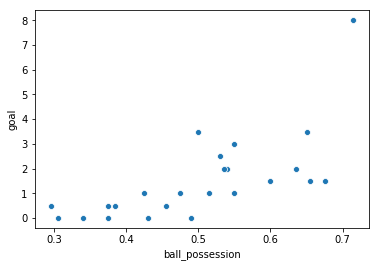

In [8]:
sns.scatterplot(average_df["ball_possession"],average_df["goal"])

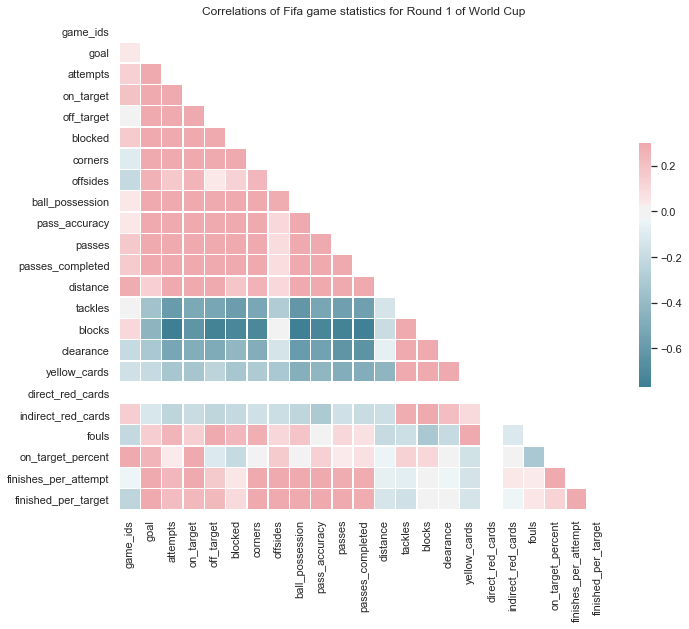

In [9]:
#graph correlations
sns.set(style="white")

d=average_df

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlations of Fifa game statistics for Round 1 of World Cup" )
plt.savefig("Round_1_Correlation_graph.png")

In [10]:
average_df.sort_values(by="ball_possession",axis=0)

,game_ids,goal,attempts,on_target,off_target,blocked,corners,offsides,ball_possession,pass_accuracy,...,tackles,blocks,clearance,yellow_cards,direct_red_cards,indirect_red_cards,fouls,on_target_percent,finishes_per_attempt,finished_per_target
team,,,,,,,,,,,,,,,,,,,,,
Thailand,300438238.5,0.5,3.5,2.5,1.0,0.0,0.0,0.5,0.295,0.635,...,23.0,6.0,38.5,1.5,0.0,0.0,5.0,0.800000,0.100000,0.166667
New Zealand,300438232.5,0.0,4.0,1.5,2.0,0.5,1.0,1.5,0.305,0.585,...,13.0,5.5,28.0,0.0,0.0,0.0,4.5,0.250000,0.000000,0.000000
Chile,300438226.5,0.0,3.5,0.5,2.5,0.5,0.5,1.5,0.340,0.615,...,23.0,4.5,32.5,2.5,0.0,0.0,10.5,0.083333,0.000000,0.000000
Argentina,300438220.0,0.0,4.0,1.5,1.5,1.0,0.0,2.0,0.375,0.600,...,16.0,2.0,22.5,1.0,0.0,0.0,8.0,0.433333,0.000000,0.000000
South Africa,300438232.5,0.5,4.5,1.5,2.0,1.0,2.5,1.0,0.375,0.595,...,20.5,6.5,32.5,1.5,0.0,0.5,8.0,0.350000,0.125000,0.250000
Cameroon,300438229.0,0.5,8.0,1.5,4.0,2.5,3.5,1.5,0.385,0.580,...,12.5,4.5,19.5,2.5,0.0,0.0,13.5,0.190909,0.045455,0.250000
Nigeria,300438217.5,1.0,10.5,1.5,6.5,2.5,4.0,1.0,0.425,0.670,...,7.0,3.5,16.5,1.5,0.0,0.0,11.0,0.138889,0.083333,0.500000
Jamaica,300438224.5,0.0,12.5,2.5,4.5,5.5,3.5,1.5,0.430,0.710,...,16.0,3.0,33.5,1.5,0.0,0.0,9.0,0.198718,0.000000,0.000000
China PR,300438223.5,0.5,10.5,2.0,5.5,3.0,5.0,1.5,0.455,0.635,...,19.5,2.5,26.0,2.0,0.0,0.0,15.5,0.213235,0.029412,0.166667


In [11]:
percents=('ball_possession',
 'pass_accuracy',
 'on_target_percent',
 'finishes_per_attempt',
 'finished_per_target')

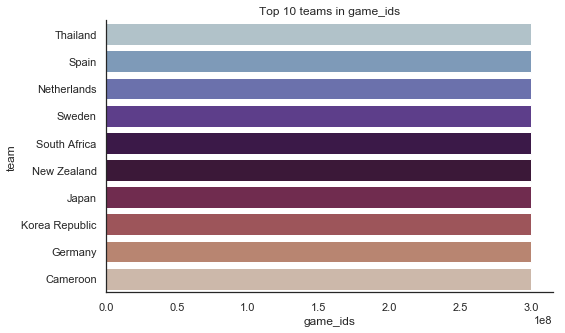

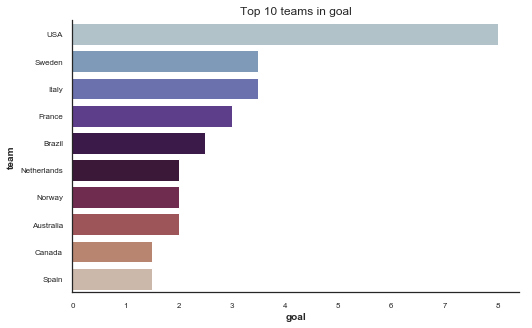

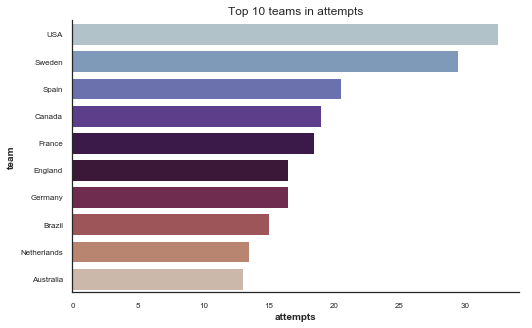

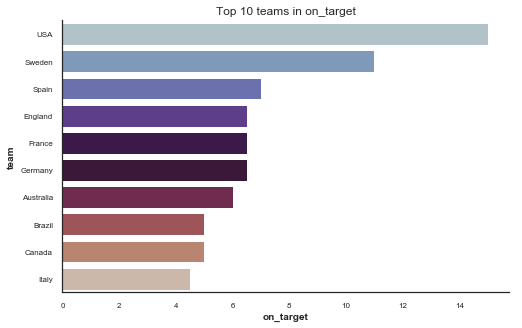

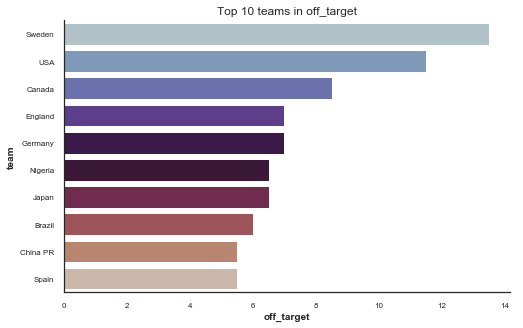

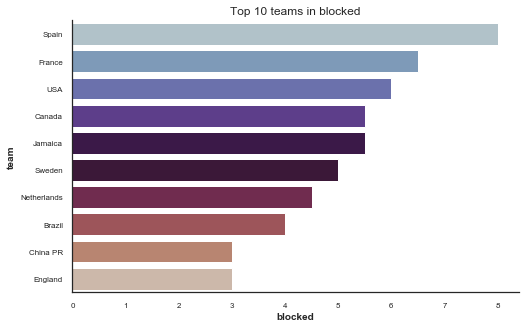

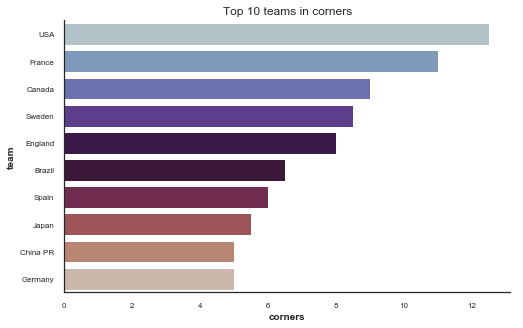

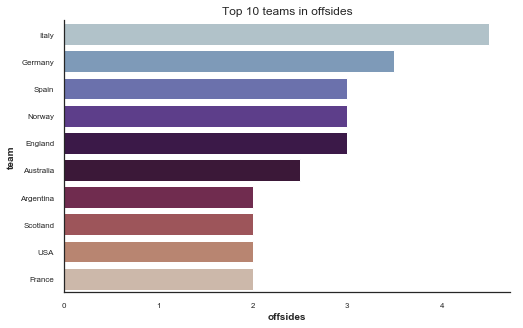

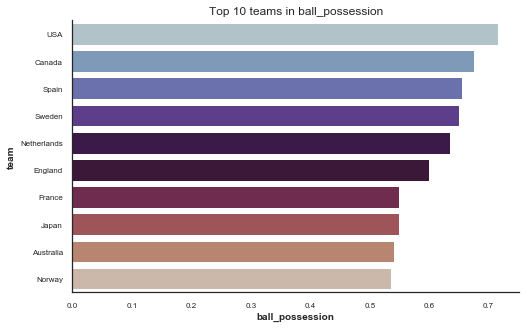

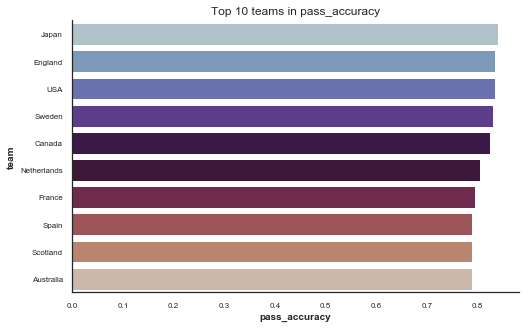

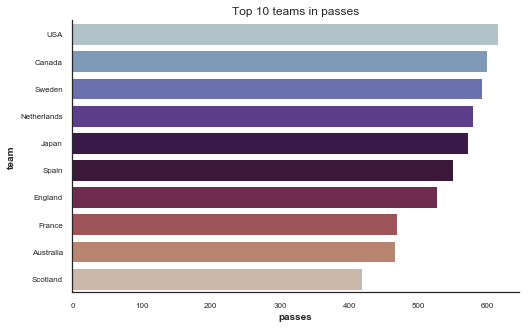

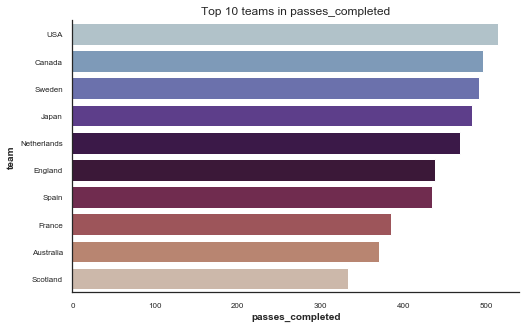

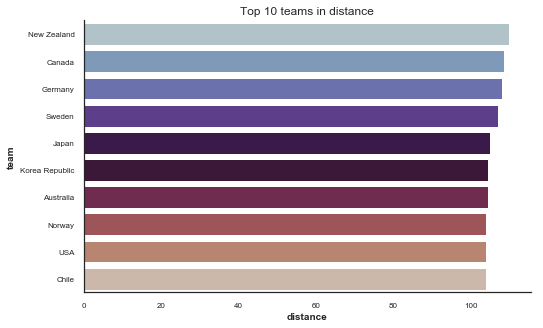

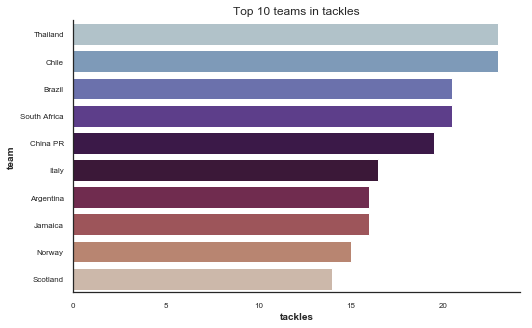

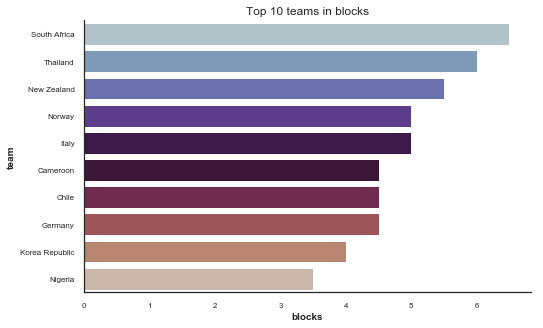

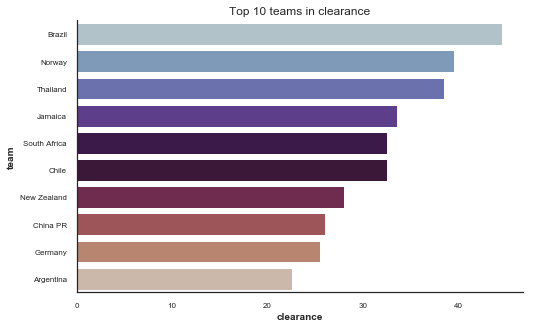

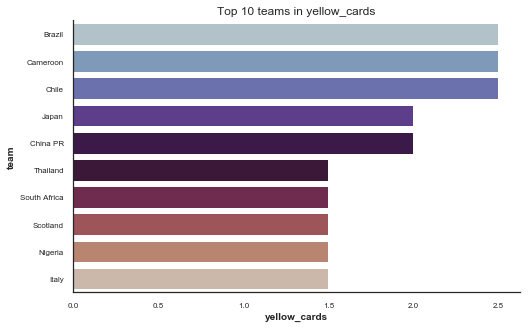

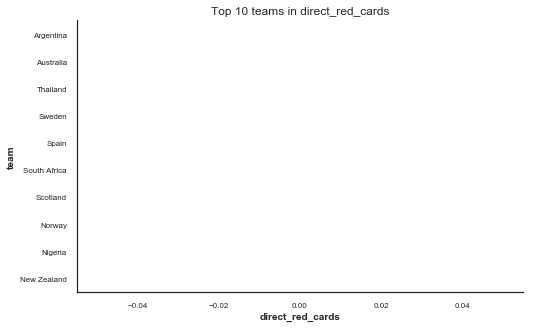

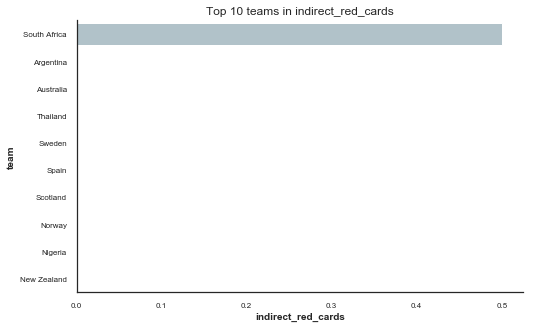

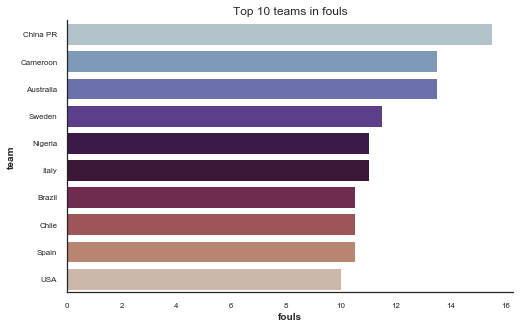

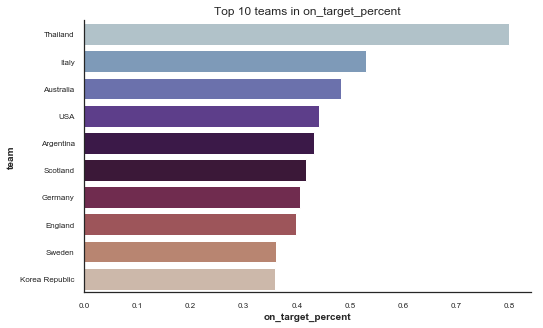

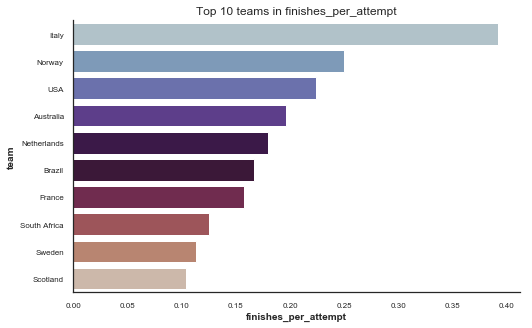

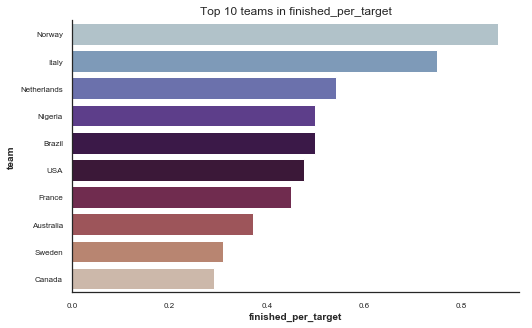

In [12]:
for variable in average_df:
    f, ax = plt.subplots(figsize=(8, 5))
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.labelsize'] = 10
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['xtick.labelsize'] = 8
    plt.rcParams['ytick.labelsize'] = 8
    plt.rcParams['figure.titlesize'] = 10
    sns.barplot(average_df.sort_values(variable,axis=0,ascending=False)[variable][:10],
                average_df.sort_values(variable,axis=0,ascending=False).index[:10], data=average_df,
                palette="twilight")
    sns.despine()
    plt.title("Top 10 teams in " + variable)
    plt.savefig("Top_10_in_" + variable+".png")
    plt.show()

# Modeling


In [27]:
features=data[['team','ball_possession',
                    'pass_accuracy',
                    'on_target_percent',
                    'finishes_per_attempt',
                    'finished_per_target','corners']]

In [28]:
features=pd.get_dummies(features)


In [35]:
features

,ball_possession,pass_accuracy,on_target_percent,finishes_per_attempt,finished_per_target,corners,team_Argentina,team_Australia,team_Brazil,team_Cameroon,...,team_Netherlands,team_New Zealand,team_Nigeria,team_Norway,team_Scotland,team_South Africa,team_Spain,team_Sweden,team_Thailand,team_USA
0,0.40,0.74,0.250000,0.000000,0.000000,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.60,0.87,0.380952,0.190476,0.500000,13.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.38,0.61,0.250000,0.000000,0.000000,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.62,0.74,0.277778,0.055556,0.200000,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.28,0.54,0.500000,0.250000,0.500000,2.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0.72,0.81,0.480000,0.120000,0.250000,5.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0.43,0.64,0.111111,0.000000,0.000000,5.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0.57,0.78,0.400000,0.300000,0.750000,5.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0.43,0.68,0.230769,0.000000,0.000000,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0.57,0.77,0.333333,0.166667,0.500000,10.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
forest = RandomForestRegressor(n_estimators=100, max_depth= 5)
forest.fit(features, data["goal"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [37]:
test_df=average_df[['ball_possession',
                    'pass_accuracy',
                    'on_target_percent',
                    'finishes_per_attempt',
                    'finished_per_target','corners']]
test_df.reset_index(level=0, inplace=True)
test_df=pd.get_dummies(test_df)

In [38]:
test_df

,ball_possession,pass_accuracy,on_target_percent,finishes_per_attempt,finished_per_target,corners,team_Argentina,team_Australia,team_Brazil,team_Cameroon,...,team_Netherlands,team_New Zealand,team_Nigeria,team_Norway,team_Scotland,team_South Africa,team_Spain,team_Sweden,team_Thailand,team_USA
0,0.375,0.600,0.433333,0.000000,0.000000,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.540,0.790,0.483660,0.196078,0.371429,5.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.530,0.760,0.333333,0.166667,0.500000,6.5,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.385,0.580,0.190909,0.045455,0.250000,3.5,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.675,0.825,0.261364,0.076705,0.291667,9.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.340,0.615,0.083333,0.000000,0.000000,0.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.455,0.635,0.213235,0.029412,0.166667,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.600,0.835,0.398496,0.097744,0.238095,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.550,0.795,0.346726,0.157738,0.450000,11.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0.515,0.700,0.405556,0.061111,0.162500,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
predictions=np.round(forest.predict(test_df),0)
predictions

array([0., 3., 2., 1., 2., 0., 1., 2., 3., 1., 2., 0., 1., 0., 3., 0., 1.,
       2., 2., 1., 1., 3., 1., 4.])

In [42]:
np.average(np.round(predictions,0) == average_df["goal"])

0.4166666666666667

In [43]:
predictions=pd.DataFrame(zip(average_df.index,predictions),columns=["team","predictions"])
predictions.head(5)

,team,predictions
0,Argentina,0.0
1,Australia,3.0
2,Brazil,2.0
3,Cameroon,1.0
4,Canada,2.0


In [54]:
round_2=[["China PR","Spain"],["South Africa","Germany"],["Nigeria","France"],["Korea Republic","Norway"],
         ["Jamaica","Australia"],["Italy","Brazil"],["Japan","England"],["Scotland","Argentina"],
         ["Cameroon","New Zealand"],["Netherlands","Canada"],["Sweden","USA"],["Thailand","Chile"]]
round_2=pd.DataFrame(round_2,columns=["home","away"])

In [55]:
round_2=pd.merge(round_2, predictions,  how='left', left_on=["home"], 
         right_on = ['team']).drop("team",axis=1)
round_2=pd.merge(round_2, predictions,  how='left', left_on=["away"], 
         right_on = ['team']).drop("team",axis=1)

In [56]:
round_2

,home,away,predictions_x,predictions_y
0,China PR,Spain,1.0,1.0
1,South Africa,Germany,1.0,1.0
2,Nigeria,France,1.0,3.0
3,Korea Republic,Norway,0.0,2.0
4,Jamaica,Australia,0.0,3.0
5,Italy,Brazil,2.0,2.0
6,Japan,England,1.0,2.0
7,Scotland,Argentina,2.0,0.0
8,Cameroon,New Zealand,1.0,0.0
9,Netherlands,Canada,3.0,2.0


In [57]:
def predictor(df):
    round_2["winner"] = ""
    round_2.columns = ["home","away","home_goals","away_goals","winner"]
    
    for index,row in df.iterrows():
        if row["home_goals"] > row["away_goals"]:
            df["winner"][index] = df["home"][index]
        elif row["home_goals"] < row["away_goals"]:
            df["winner"][index] = df["away"][index]
        else:
            df["winner"][index] = "Tie"
        print(df["winner"][index]+" ("+df["home"][index]+" "+str(df["home_goals"][index])+" : "+str(df["away_goals"][index])+" "+df["away"][index]+")")
    return df

In [58]:
predictor(round_2)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Tie (China PR 1.0 : 1.0 Spain)
Tie (South Africa 1.0 : 1.0 Germany)
France (Nigeria 1.0 : 3.0 France)
Norway (Korea Republic 0.0 : 2.0 Norway)
Australia (Jamaica 0.0 : 3.0 Australia)
Tie (Italy 2.0 : 2.0 Brazil)
England (Japan 1.0 : 2.0 England)
Scotland (Scotland 2.0 : 0.0 Argentina)
Cameroon (Cameroon 1.0 : 0.0 New Zealand)
Netherlands (Netherlands 3.0 : 2.0 Canada)
USA (Sweden 3.0 : 4.0 USA)
Thailand (Thailand 1.0 : 0.0 Chile)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,home,away,home_goals,away_goals,winner
0,China PR,Spain,1.0,1.0,Tie
1,South Africa,Germany,1.0,1.0,Tie
2,Nigeria,France,1.0,3.0,France
3,Korea Republic,Norway,0.0,2.0,Norway
4,Jamaica,Australia,0.0,3.0,Australia
5,Italy,Brazil,2.0,2.0,Tie
6,Japan,England,1.0,2.0,England
7,Scotland,Argentina,2.0,0.0,Scotland
8,Cameroon,New Zealand,1.0,0.0,Cameroon
9,Netherlands,Canada,3.0,2.0,Netherlands
